In [2]:
import pandas as pd
import os
import pandas as pd
from GrBinaryIPF import GrBinaryIPF
import math

fpath =  "data/GermanCredit_new.csv"

In [3]:
data = pd.read_csv(fpath)

In [4]:
data.head()

,id,DurationMonth,CreditAmount,score,sex,age35,protected
0,0,0.029412,0.949433,0.600715,1,0,2
1,1,0.647059,0.686310,0.496131,0,1,3
2,2,0.117647,0.898426,0.506866,1,0,2
3,3,0.558824,0.580059,0.599482,1,0,2
4,4,0.294118,0.745791,0.550060,1,0,2


In [5]:
data["score"]

0      0.600715
1      0.496131
2      0.506866
3      0.599482
4      0.550060
         ...   
995    0.526056
996    0.522583
997    0.574356
998    0.560963
999    0.470991
Name: score, Length: 1000, dtype: float64

In [6]:
movies = [i for i in range(1,265)]
nrow = len(data)
ncol = int(data.size/len(data))
print(ncol)

7


In [7]:
rankDic = {}
rankList = []
for i in range(1,ncol-1):
    row = data.iloc[:,i ]
    
    #print(row)
    rank = {}
    for j in range(0,nrow):
        rankDic[(i-1,row[j])] = j
        rank[row[j]] = j  
    rankList.append(rank)

In [5]:
G1 = []
G2 = []
row = data.iloc[25, :]
for i in range(0,num_of_player):
    if(row[i] == 0):
        G1.append(players[i])
    else:
        G2.append(players[i])

In [6]:
p1 = len(G1)/len(itemList)
p2 = len(G2)/len(itemList)

In [7]:
rank = data.iloc[1, :]

In [8]:
ranktup = []
j = 0
for i in rank:
    ranktup.append((i,j))
    j = j + 1
ranktup.sort()
rank = []

for i,j in ranktup:
    rank.append(j)   


In [9]:
tup = []
for i in range(0,len(rank)):
    tup.append((rank[i],i))

In [10]:
tup.sort()

In [11]:
rank = []
for i,j in tup:
    rank.append(j)

In [12]:
group = row

In [13]:

def GrBinaryIPF(rank,group):
    Rho0 = []
    Rho1 = []
    for i in rank:
        if group[i] == 1:
            Rho0.append(i)
        else:
            Rho1.append(i)

    j = 1
    rankDic = {}
    for itm in rank:
        rankDic[itm] = j
        j = j + 1

    urgent = []
    Rout = []
    P1count = 0
    P0count = 0

    Fp0 = len(Rho0)/len(rank)
    Fp1 = len(Rho1)/len(rank)

    i = 1
    while len(Rho0) != 0 or len(Rho1) != 0:
        #print(Rout)
        if P1count >= len(Rho1):
            Rout.extend(Rho0[P0count:len(Rho0)])
            return Rout
        if P1count >= len(Rho0):
            Rout.extend(Rho1[P1count:len(Rho1)])
            return Rout

        if len(urgent) == 0:
            if rankDic[Rho1[P1count]] < rankDic[Rho0[P0count]]:
                Rout.append(Rho1[P1count])
                P1count = P1count + 1
            else:
                Rout.append(Rho0[P0count])
                P0count = P0count + 1
        else:
            if urgent[0] == 'P1':
                Rout.append(Rho1[P1count])
                P1count = P1count + 1
            else:
                Rout.append(Rho0[P0count])
                P0count = P0count + 1
            urgent = []
        # update urgent
        if Fp1 * (i + 1) - P1count >= 1:
            urgent.append('P1')

        if Fp0 * (i + 1) - P0count >= 1:
            urgent.append('P0')
        i = i + 1
        #print(i)
    return  Rout


In [14]:
Rout = GrBinaryIPF(rank,group)

In [15]:
A = ['0','1']

In [16]:
P = {'0':p1,'1':p2}

In [17]:
S={}
for a in A:
   
    scoreList = []
    
    
    S[a] = scoreList

In [18]:
S = {A[0]:[],A[1]:[]}
score = len(rank)
for i in rank:
    if group[i] == 0:
        S[A[0]].append((score,i))
    else:
        S[A[1]].append((score,i)) 
    score = score - 1

In [19]:
def swap(dict,i,j):
    item = dict[i]
    dict[i] = dict[j]
    dict[j] = item 

In [20]:
def DetConstSort(S,A,P,kmax):
    counts = {}
    minCounts = {}
    for ai in A:
        counts[ai] = 0
        minCounts[ai] = 0
    
    rankedAttList = {}
    rankedScoreList = {}
    maxIndices = {}
    lastEmpty = 0
    k = 0
    
    while lastEmpty <= kmax:
        k = k + 1
        tempMinCounts = {}
        for ai in A:
            tempMinCounts[ai] = math.floor(k * P[ai])
        changedMins = []
        for ai in A:
            if minCounts[ai ] < tempMinCounts[ai]:
                changedMins.append((S[ai][counts[ai]],ai))
        if len(changedMins) != 0 :
            changedMins.sort(reverse=True)
            #ordChangedMins = changedMins
        for sai,ai in  changedMins:
            rankedAttList[lastEmpty] = ai
            
            rankedScoreList[lastEmpty] = S[ai][counts[ai]]
            maxIndices[lastEmpty] = k
            start = lastEmpty
            while start > 0 and maxIndices[start - 1] >= start and rankedScoreList[start-1][0] < rankedScoreList[start][0]:
                swap(maxIndices,start - 1,start)
                swap(rankedAttList,start - 1, start)
                swap(rankedScoreList,start - 1, start)
                start = start - 1
            counts[ai] = counts[ai] + 1 
            lastEmpty = lastEmpty + 1
        minCounts = tempMinCounts
    return (rankedAttList, rankedScoreList)

In [21]:
kmax = len(rank) - 1
rankedAttList,rankedScoreList = DetConstSort(S,A,P,kmax)

In [22]:
detOut = []
for key in rankedScoreList.keys():
    detOut.append(rankedScoreList[key][1])

In [23]:
sumFail = 0
count = {0:0,1:0}
x_GrB = []
y = []
A = [0,1]
P=[p1,p2]
for i in range(0,30):
    itemId = Rout[i]
    itemGrp = group[itemId]
    
    count[itemGrp] = count[itemGrp] + 1
    
    violates = 0
    n = i + 1
    for j in A:
        bot = math.floor(n*P[j])
        top = math.ceil(n*P[j])
        #print(j,bot,top)
        if (count[j] > top ):
            violates = violates + 1
    print(n,violates)
    
    x_GrB.append((n-sumFail)/n*100)
    sumFail =sumFail +  violates
    print('pfairness satisfied by GrBinaryIPF = ',n,(n-sumFail)/n*100)

1 0
pfairness satisfied by GrBinaryIPF =  1 100.0
2 0
pfairness satisfied by GrBinaryIPF =  2 100.0
3 0
pfairness satisfied by GrBinaryIPF =  3 100.0
4 0
pfairness satisfied by GrBinaryIPF =  4 100.0
5 0
pfairness satisfied by GrBinaryIPF =  5 100.0
6 0
pfairness satisfied by GrBinaryIPF =  6 100.0
7 0
pfairness satisfied by GrBinaryIPF =  7 100.0
8 0
pfairness satisfied by GrBinaryIPF =  8 100.0
9 0
pfairness satisfied by GrBinaryIPF =  9 100.0
10 0
pfairness satisfied by GrBinaryIPF =  10 100.0
11 0
pfairness satisfied by GrBinaryIPF =  11 100.0
12 0
pfairness satisfied by GrBinaryIPF =  12 100.0
13 0
pfairness satisfied by GrBinaryIPF =  13 100.0
14 0
pfairness satisfied by GrBinaryIPF =  14 100.0
15 0
pfairness satisfied by GrBinaryIPF =  15 100.0
16 0
pfairness satisfied by GrBinaryIPF =  16 100.0
17 0
pfairness satisfied by GrBinaryIPF =  17 100.0
18 0
pfairness satisfied by GrBinaryIPF =  18 100.0
19 0
pfairness satisfied by GrBinaryIPF =  19 100.0
20 0
pfairness satisfied by Gr

In [24]:
A

[0, 1]

In [28]:
x = [10,20,30,40,50]
y = [2,4,13,17,21]
z = [0,1,4,6,7]

In [29]:
sumFail = 0
sumtfail = 0
count = {0:0,1:0}
y_det = []
z_det = []
A = [0,1]
P=[  0.59, 0.067] 
for i in range(0,len(rank)):
    itemId = detOut[i]
    itemGrp = group[itemId]
    
    count[itemGrp] = count[itemGrp] + 1
    
    violates = 0
    tViolates = 0
    n = i + 1
    for j in A:
        bot = math.floor(n*P[j])
        top = math.ceil(n*P[j])
        #print(j,bot,top,count[j])
        if ((count[j] <= top ) == False ):
            violates =  1
            tViolates = tViolates + 1
            #print('----------------------',j,bot,top,count[j])
    print(n,violates)
    
    sumFail = sumFail +  violates
    sumtfail = sumtfail + 2 - tViolates
    
    y_det.append(100-sumFail/n*100)
    z_det.append((sumtfail/n)/2*100)
    
    print('sumfail = ',n,100-sumFail/n*100)
    print('fail group = ',n,tViolates)

1 0
sumfail =  1 100.0
fail group =  1 0
2 0
sumfail =  2 100.0
fail group =  2 0
3 0
sumfail =  3 100.0
fail group =  3 0
4 0
sumfail =  4 100.0
fail group =  4 0
5 1
sumfail =  5 80.0
fail group =  5 1
6 1
sumfail =  6 66.66666666666667
fail group =  6 1
7 1
sumfail =  7 57.142857142857146
fail group =  7 1
8 1
sumfail =  8 50.0
fail group =  8 1
9 1
sumfail =  9 44.44444444444444
fail group =  9 1
10 1
sumfail =  10 40.0
fail group =  10 1
11 1
sumfail =  11 36.36363636363637
fail group =  11 1
12 1
sumfail =  12 33.33333333333334
fail group =  12 1
13 1
sumfail =  13 30.769230769230774
fail group =  13 1
14 1
sumfail =  14 28.57142857142857
fail group =  14 1
15 1
sumfail =  15 26.66666666666667
fail group =  15 1
16 1
sumfail =  16 25.0
fail group =  16 1
17 1
sumfail =  17 23.529411764705884
fail group =  17 1
18 1
sumfail =  18 22.222222222222214
fail group =  18 1
19 1
sumfail =  19 21.05263157894737
fail group =  19 1
20 1
sumfail =  20 20.0
fail group =  20 1
21 1
sumfail =  

In [30]:
def KendallTau(P,Q,allids):
    combinations = [p for p in itertools.product(allids, repeat=2)]
    distance = 0
    for tup in combinations:
        if P[tup[0]] < P[tup[1]] and  Q[tup[1]] < Q[tup[0]]:
            distance = distance + 1
    return distance
P={}
Q = {}
import itertools
allids = []
for i in range(0,len(detOut)):
    allids.append(i)
    
for i in range(0, len(detOut)):
    P[detOut[i]] = i
    Q[rank[i]] = i

k = KendallTau(P,Q,allids)

In [31]:
#3 (a) Fantasy football:OptIPF, GrBinaryIPF ,DetConstSort

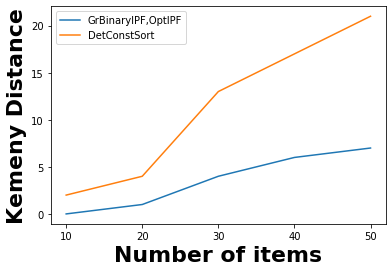

In [33]:
import matplotlib.pyplot as plt

plt.plot(x,z)
plt.plot(x,y)

# create an index for each tick position

plt.ylabel('Kemeny Distance',fontweight='bold',fontsize=22)
plt.xlabel('Number of items',fontweight='bold',fontsize=22)

plt.xticks([10,20,30,40,50], ['10','20','30','40','50'])
plt.legend(["GrBinaryIPF,OptIPF","DetConstSort"])
plt.show()